# R script

***
### 

In [1]:
library(ggplot2)
library(reshape2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


In [4]:
# Get auroc on CV with the maximum mean in the model
get_auroc <- function(cv,col_name){
    auroc_on_CV_str <- cv[which.max(cv$mean_auroc_on_CV),"auroc_on_CV"]
    auroc_on_CV_str <- gsub('\\]|\\[',"",auroc_on_CV_str)
    auroc_on_CV_df <- data.frame(as.double(unlist(strsplit(auroc_on_CV_str,","))))
    colnames(auroc_on_CV_df) <- col_name
    return(auroc_on_CV_df)
}

In [5]:
# Load data
ML_cv_result <- "../03_Model_Construction/01_Machine_Learning_Model/01_ML_Model_Output/ML_CV_result.tsv"
CNN_cv_result <- "../03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_9000nt_Model_Output/CNN_CV_result.tsv"
RNN_cv_result <- "../03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/RNN_9000nt_Model_Output/RNN_CV_result.tsv"
CNN_RNN_cv_result <- "../03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_RNN_9000nt_Model_Output/CNN_RNN_CV_result.tsv"

ML_cv <- read.csv(ML_cv_result,sep='\t')
CNN_cv <- read.csv(CNN_cv_result,sep='\t')
RNN_cv <- read.csv(RNN_cv_result,sep='\t')
CNN_RNN_cv <- read.csv(CNN_RNN_cv_result,sep='\t')

# Group
CNN <- get_auroc(CNN_cv,"CNN")
RNN <- get_auroc(RNN_cv,"RNN")
CNN_RNN <- get_auroc(CNN_RNN_cv,"CNN_RNN")

In [11]:
# Combination
total_cv_result <- cbind(ML_cv,CNN,RNN,CNN_RNN)
total_cv_result_long<-melt(total_cv_result,measure.vars=colnames(total_cv_result),variable.name="model",value.name="auroc")

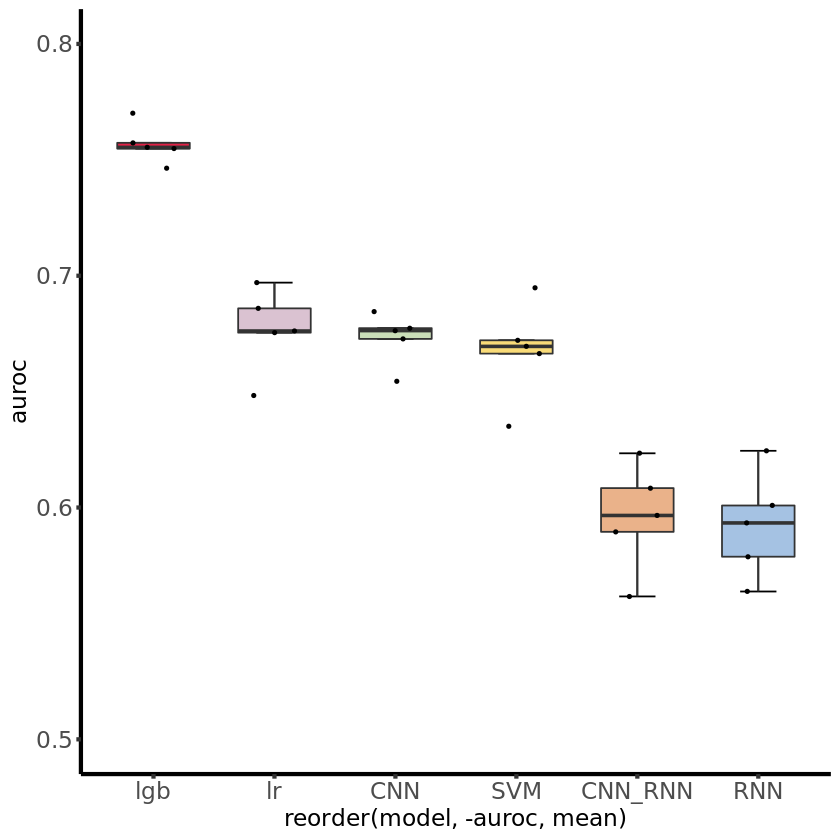

In [13]:
# plot
p_box <- ggplot(data=total_cv_result_long,aes(x=reorder(model,-auroc,mean),y=auroc))+
stat_boxplot(geom = "errorbar",width=0.3)+
geom_boxplot(fill = c("#E22146","#DAC2D1","#CADEB8","#F9DB78","#EAB28A","#A5C2E3"),width = 0.6,outlier.color="white")+
geom_jitter(width=0.2,size=0.8)+
ylim(0.5,0.8)+theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))
ggsave("./01_RNA-Light_CV_Result_with_text.pdf", p_box, width = 10, height = 10) 

p_box 

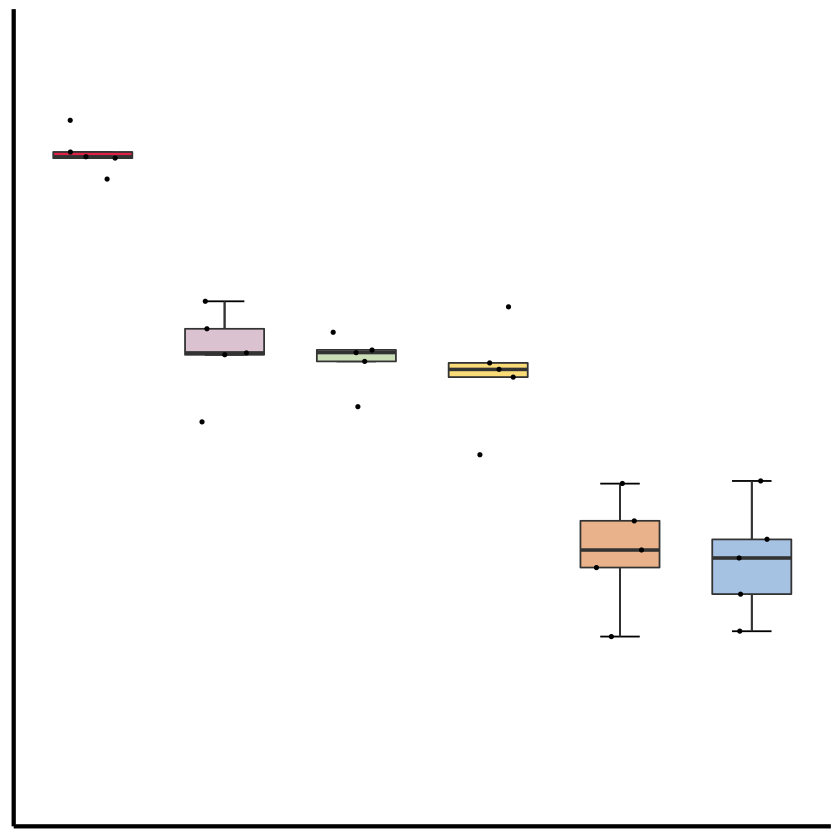

In [14]:
p_box2 <- p_box + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./01_RNA-Light_CV_Result.pdf", p_box2, width = 10, height = 10) 

p_box2

In [15]:
t.test(total_cv_result$lgb,total_cv_result$lr,alternative = "greater")


	Welch Two Sample t-test

data:  total_cv_result$lgb and total_cv_result$lr
t = 8.9827, df = 5.6957, p-value = 7.113e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.06269601        Inf
sample estimates:
mean of x mean of y 
0.7567856 0.6765694 


In [16]:
t.test(total_cv_result$lgb,total_cv_result$CNN,alternative = "greater")


	Welch Two Sample t-test

data:  total_cv_result$lgb and total_cv_result$CNN
t = 13.266, df = 7.4541, p-value = 9.387e-07
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.07184286        Inf
sample estimates:
mean of x mean of y 
0.7567856 0.6731001 
